In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook, tqdm
tqdm.pandas(tqdm_notebook)
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn import preprocessing as pr

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#SMOTE
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'category_encoders'

In [2]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
file='Insurance.csv'

In [4]:
df=pd.read_csv(file)
df

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,NaN,home,english,Bachelor,malay,NaN,yes,...,terrace,2.0,10242.0,NaN,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,NaN,NaN,outdoor,malay,Diploma,chinese,Malaysian,no,...,terrace,2.0,NaN,73926.0,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,NaN,frequent,pub_goer,english,Bachelor,others,NaN,no,...,condominium,2.0,4316.0,140734.0,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,NaN,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,...,terrace,NaN,4845.0,NaN,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,NaN,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,...,condominium,2.0,9883.0,98833.0,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,female,married,frequent,outdoor,english,Diploma,NaN,NaN,yes,...,terrace,2.0,4831.0,NaN,PersonalRetirement,KidMedical,HomeSafe,driving,KidsFlyUp,yes
496,26.0,male,married,frequent,home,english,Bachelor,others,NaN,no,...,condominium,NaN,7455.0,65384.0,PersonalMedical,KidEducation,SchoolAgain,driving,KidsFlyUp,no
497,19.0,female,NaN,frequent,home,malay,Diploma,others,NaN,yes,...,condominium,2.0,3329.0,51962.0,PersonalSaving,KidEducation,COVIDFree,driving,KidsFlyUp,no
498,41.0,male,NaN,once_in_a_while,pub_goer,malay,Bachelor,indian,Malaysian,yes,...,terrace,3.0,9300.0,NaN,PersonalRetirement,KidSaving,COVIDFree,driving,KidsFlyUp,no


In [5]:
df.dtypes

Age                      float64
Gender                    object
MaritalStatus             object
SmokerStatus              object
LifeStyle                 object
LanguageSpoken            object
HighestEducation          object
Race                      object
Nationality               object
MalaysiaPR                object
MovingToNewCompany        object
Occupation                object
Telco                     object
HomeAddress               object
ResidentialType           object
NoOfDependent            float64
FamilyExpenses(month)    float64
AnnualSalary             float64
Customer_Needs_1          object
Customer_Needs_2          object
PurchasedPlan1            object
Transport                 object
PurchasedPlan2            object
MedicalComplication       object
dtype: object

In [6]:
#df.dropna(inplace=True)
df.isnull().sum()

Age                       92
Gender                     0
MaritalStatus            142
SmokerStatus              66
LifeStyle                  0
LanguageSpoken             0
HighestEducation           0
Race                     115
Nationality              145
MalaysiaPR                 0
MovingToNewCompany         0
Occupation               145
Telco                      0
HomeAddress               79
ResidentialType            0
NoOfDependent             94
FamilyExpenses(month)    121
AnnualSalary             156
Customer_Needs_1           0
Customer_Needs_2           0
PurchasedPlan1             0
Transport                  0
PurchasedPlan2             0
MedicalComplication        0
dtype: int64

In [7]:
np.mean(df['FamilyExpenses(month)'])

6335.403693931398

In [8]:
np.std(df['FamilyExpenses(month)'])

2288.5051862355454

In [9]:
statistics.mode(df['FamilyExpenses(month)'])

7596.0

In [10]:
df.head()

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,NaN,home,english,Bachelor,malay,NaN,yes,...,terrace,2.0,10242.0,NaN,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,NaN,NaN,outdoor,malay,Diploma,chinese,Malaysian,no,...,terrace,2.0,NaN,73926.0,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,NaN,frequent,pub_goer,english,Bachelor,others,NaN,no,...,condominium,2.0,4316.0,140734.0,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,NaN,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,...,terrace,NaN,4845.0,NaN,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,NaN,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,...,condominium,2.0,9883.0,98833.0,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes


In [11]:
#df.isnull()
df1=df

In [12]:
df1.drop(['SmokerStatus','LanguageSpoken','HomeAddress'],axis=1,inplace=True)

In [13]:
df1
df1.isnull().sum()

Age                       92
Gender                     0
MaritalStatus            142
LifeStyle                  0
HighestEducation           0
Race                     115
Nationality              145
MalaysiaPR                 0
MovingToNewCompany         0
Occupation               145
Telco                      0
ResidentialType            0
NoOfDependent             94
FamilyExpenses(month)    121
AnnualSalary             156
Customer_Needs_1           0
Customer_Needs_2           0
PurchasedPlan1             0
Transport                  0
PurchasedPlan2             0
MedicalComplication        0
dtype: int64

In [14]:
#filling the missing data
df1['Race'].fillna(df1['Race'].value_counts().index[0],inplace=True)
df1['Nationality'].fillna(df1['Nationality'].value_counts().index[0],inplace=True)
df1['Occupation'].fillna(df1['Occupation'].value_counts().index[0],inplace=True)
df1['AnnualSalary'].fillna(df1['AnnualSalary'].mean(),inplace=True)
df1['FamilyExpenses(month)'].fillna(df1['FamilyExpenses(month)'].mean(),inplace=True)
df1['NoOfDependent'].fillna(df1['NoOfDependent'].mode()[0],inplace=True)
df1['Age'].fillna(df1['Age'].mode()[0],inplace=True)
df1['MaritalStatus'].fillna(df1['MaritalStatus'].value_counts().index[0],inplace=True)



In [16]:
df1.head(20)

,Age,Gender,MaritalStatus,LifeStyle,HighestEducation,Race,Nationality,MalaysiaPR,MovingToNewCompany,Occupation,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,home,Bachelor,malay,Malaysian,yes,yes,employer,...,terrace,2.0,10242.000000,118087.540698,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,single,outdoor,Diploma,chinese,Malaysian,no,yes,selfEmployed,...,terrace,2.0,6335.403694,73926.000000,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,single,pub_goer,Bachelor,others,Malaysian,no,no,privateEemployee,...,condominium,2.0,4316.000000,140734.000000,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,single,pub_goer,Bachelor,malay,Malaysian,yes,no,privateEemployee,...,terrace,2.0,4845.000000,118087.540698,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,single,home,Bachelor,chinese,Malaysian,yes,yes,privateEemployee,...,condominium,2.0,9883.000000,98833.000000,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes
5,44.0,male,single,home,Bachelor,malay,Malaysian,yes,no,privateEemployee,...,terrace,3.0,6174.000000,118087.540698,PersonalRetirement,KidMedical,HomeSafe,driving,KidsFlyUp,yes
6,35.0,male,single,pub_goer,Bachelor,indian,others,yes,yes,privateEemployee,...,terrace,2.0,7735.000000,118087.540698,PersonalSaving,KidMedical,HomeSafe,driving,NoMoneyDown,yes
7,33.0,male,married,home,Bachelor,indian,Malaysian,no,yes,privateEemployee,...,condominium,2.0,2679.000000,166567.000000,PersonalMedical,KidMedical,SchoolAgain,driving,XEdu,yes
8,33.0,male,married,outdoor,Bachelor,malay,Malaysian,yes,no,privateEemployee,...,flat,2.0,4930.000000,51144.000000,PersonalSaving,KidMedical,COVIDFree,publicTransport,NoMoneyDown,no
9,33.0,male,single,home,Bachelor,indian,Malaysian,yes,no,govServant,...,condominium,2.0,5301.000000,127075.000000,PersonalRetirement,KidEducation,SchoolAgain,driving,KidsFlyUp,yes


In [4490]:
df1.isnull().sum()

Age                      0
Gender                   0
MaritalStatus            0
LifeStyle                0
HighestEducation         0
Race                     0
Nationality              0
MalaysiaPR               0
MovingToNewCompany       0
Occupation               0
Telco                    0
ResidentialType          0
NoOfDependent            0
FamilyExpenses(month)    0
AnnualSalary             0
Customer_Needs_1         0
Customer_Needs_2         0
PurchasedPlan1           0
Transport                0
PurchasedPlan2           0
MedicalComplication      0
dtype: int64

In [4491]:
Adf=df1
Cdf=df1

In [4492]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [4493]:
outlier_datapoints = detect_outlier(df['FamilyExpenses(month)'])
print(outlier_datapoints)

[]


In [4494]:
#plt.scatter(df['Age'],df['MedicalComplication'])

In [4495]:
df1['PurchasedPlan1'].unique()

array(['SchoolAgain', 'COVIDFree', 'HomeSafe'], dtype=object)

In [4496]:
#df1['Plan1'] = LabelEncoder().fit_transform(df.PurchasedPlan1)
#df1['Plan2'] = LabelEncoder().fit_transform(df.PurchasedPlan2)

In [4497]:
#df1.drop('PurchasedPlan1',1,inplace=True)
#df1.drop('PurchasedPlan2',1,inplace=True)

In [4498]:
Vdf=df1
#Vdf

In [4499]:

col_list = [col for col in df1.columns.tolist() if df1[col].dtype.name == "object"]
df_oh = df1[col_list]
df1 = df1.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df1 = pd.concat([df1, df_oh], axis=1)
df1.head()

,Age,NoOfDependent,FamilyExpenses(month),AnnualSalary,Gender_female,Gender_male,MaritalStatus_married,MaritalStatus_single,LifeStyle_home,LifeStyle_outdoor,...,PurchasedPlan1_COVIDFree,PurchasedPlan1_HomeSafe,PurchasedPlan1_SchoolAgain,Transport_driving,Transport_publicTransport,PurchasedPlan2_KidsFlyUp,PurchasedPlan2_NoMoneyDown,PurchasedPlan2_XEdu,MedicalComplication_no,MedicalComplication_yes
0,35.0,2.0,10242.000000,118087.540698,1,0,0,1,1,0,...,0,0,1,1,0,0,1,0,1,0
1,25.0,2.0,6335.403694,73926.000000,0,1,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
2,27.0,2.0,4316.000000,140734.000000,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
3,33.0,2.0,4845.000000,118087.540698,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
4,28.0,2.0,9883.000000,98833.000000,1,0,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [4500]:
sns.set(rc={'figure.figsize':(12,6)})

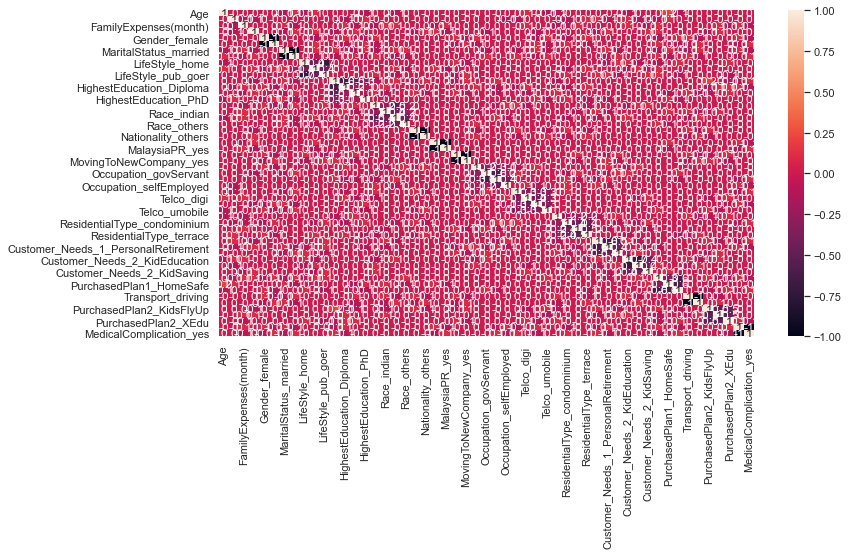

In [4467]:


correlation_matrix = df1.iloc[:,:].corr().round(1)
#correlation_matrix

sns.heatmap(data=correlation_matrix, annot=True)

In [4501]:
scaler = StandardScaler()
features = [['Age', 'NoOfDependent', 'FamilyExpenses(month)', 'AnnualSalary']]
for feature in features:
    df1[feature] = scaler.fit_transform(df1[feature])

In [4502]:
#y = df1.Plan1
#y1 = df1.Plan2
#y=df1.iloc[:,41:44]
y = df1[['PurchasedPlan1_HomeSafe','PurchasedPlan1_COVIDFree','PurchasedPlan1_SchoolAgain']]
#y = df1[['PurchasedPlan2_KidsFlyUp','PurchasedPlan2_NoMoneyDown','PurchasedPlan2_XEdu']]
#X=df1.drop(['Plan1'],1)
X=df1.drop(['PurchasedPlan1_HomeSafe','PurchasedPlan1_COVIDFree','PurchasedPlan1_SchoolAgain'],1)
#X=df1.drop(['PurchasedPlan2_KidsFlyUp','PurchasedPlan2_NoMoneyDown','PurchasedPlan2_XEdu'],1)
colnames = X.columns

In [4504]:
#y.values.unique

In [4471]:
from sklearn.preprocessing import label_binarize

In [4472]:
#y= label_binarize(y, classes=['PurchasedPlan1_HomeSafe','PurchasedPlan1_COVIDFree','PurchasedPlan1_SchoolAgain'])
#nclass=y.shape[1]

In [4473]:
#SMOTE
from imblearn.over_sampling import SMOTE


In [4474]:
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.values.argmax(1), test_size=0.3)
columns=X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train,y_train)

os_data_X =pd.DataFrame(data=os_data_X,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['y'])
print('length of oversamples data is',len(os_data_X))
print("number for plan1_0 is oversamples data:",len(os_data_y[os_data_y['y']==0]))
print("number for plan1_1 is oversampled data:",len(os_data_y[os_data_y['y']==1]))
print("number for plan1_2 is oversamples data:",len(os_data_y[os_data_y['y']==2])) 
print("proportion of plan1_0:",len(os_data_y[os_data_y['y']==0])/len(os_data_X))

length of oversamples data is 609
number for plan1_0 is oversamples data: 203
number for plan1_1 is oversampled data: 203
number for plan1_2 is oversamples data: 203
proportion of plan1_0: 0.3333333333333333


In [4280]:
os_data_X,os_data_y=os.fit_sample(X_train,y_train)

In [4114]:
#os_data_X
#print(os_data_y)

In [4115]:
#Boruta
rf=RandomForestClassifier(n_jobs=1,class_weight='balanced_subsample',max_depth=5)
feat_selector=BorutaPy(rf,n_estimators='auto',random_state=1)

In [4116]:
feat_selector.fit(os_data_X.values,os_data_y.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                          max_depth=5, n_estimators=56,
                                          n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x180733D8940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x180733D8940)

In [4117]:
# your codes here...
boruta_score=ranking(list(map(float,feat_selector.ranking_)),colnames,order=-1)
boruta_score=pd.DataFrame(list(boruta_score.items()),columns=['Features','Score'])
boruta_score=boruta_score.sort_values("Score",ascending=False)

In [4118]:
print('---------Top 10----------')
#display(boruta_score.head(15))

print('---------Bottom 15----------')
boruta_score.tail(25)

---------Top 10----------
---------Bottom 15----------


,Features,Score
19,Nationality_Malaysian,0.53
28,Occupation_selfEmployed,0.49
31,Telco_maxis,0.47
21,MalaysiaPR_no,0.43
37,Customer_Needs_1_PersonalMedical,0.43
44,Transport_publicTransport,0.43
6,MaritalStatus_married,0.38
43,Transport_driving,0.38
13,HighestEducation_Master,0.34
39,Customer_Needs_1_PersonalSaving,0.32


In [4336]:

#using boruta feature
os_data_x2=os_data_X.drop(['Telco_celcom','ResidentialType_condominium','Gender_male','Customer_Needs_1_PersonalSaving',
                           'MalaysiaPR_no','LifeStyle_pub_goer','MedicalComplication_no','HighestEducation_Diploma',
                           'Occupation_employer','Customer_Needs_2_KidSaving','Occupation_privateEemployee','ResidentialTy  pe_bungalow',
                           'HighestEducation_PhD','Transport_driving','HighestEducation_Bachelor',
                           'Telco_umobile','Telco_digi','Race_chinese','Customer_Needs_1_PersonalMedical',
                           'Transport_publicTransport','ResidentialType_terrace','Nationality_others','Nationality_Malaysian',
                           'Race_indian','MovingToNewCompany_yes'],1)

Text(0.5, 1.0, 'Boruta Top 30 Features')

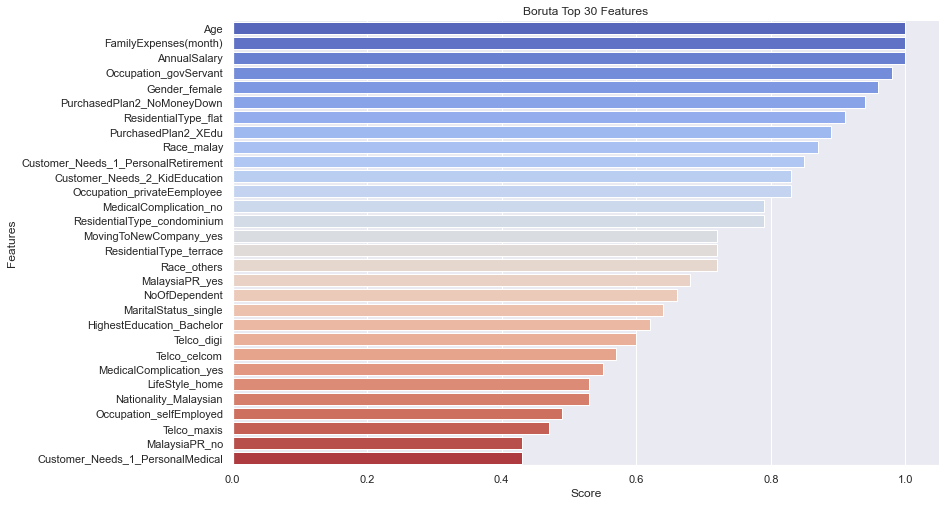

In [4439]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:30], kind = "bar", 
               height=7, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 30 Features")

In [4121]:
#from sklearn.ensemble import ExtraTreesClassifier

In [4281]:
rv=RandomForestClassifier(n_jobs=1,class_weight='balanced',max_depth=5,n_estimators=100)
rv.fit(os_data_X,os_data_y)
rve=RFECV(rv,min_features_to_select=1,cv = 3)

In [4282]:
rve.fit(os_data_X,os_data_y)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=1))

In [4283]:
rfe_score = ranking(list(map(float, rve.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [4303]:
print('---------top 10----------')
display(rfe_score.head(10))

---------top 10----------


,Features,Score
0,Age,1.0
24,MovingToNewCompany_yes,1.0
26,Occupation_govServant,1.0
27,Occupation_privateEemployee,1.0
29,Telco_celcom,1.0
30,Telco_digi,1.0
31,Telco_maxis,1.0
32,Telco_umobile,1.0
34,ResidentialType_condominium,1.0
35,ResidentialType_flat,1.0


In [4126]:
#using random forest feature


In [4289]:
os_data_x3=os_data_X.drop(['Nationality_others','Customer_Needs_2_KidSaving','LifeStyle_pub_goer',
                           'Occupation_selfEmployed','ResidentialType_bungalow','Occupation_employer','HighestEducation_PhD'],1)

Text(0.5, 1.0, 'RFE Top 30 Features')

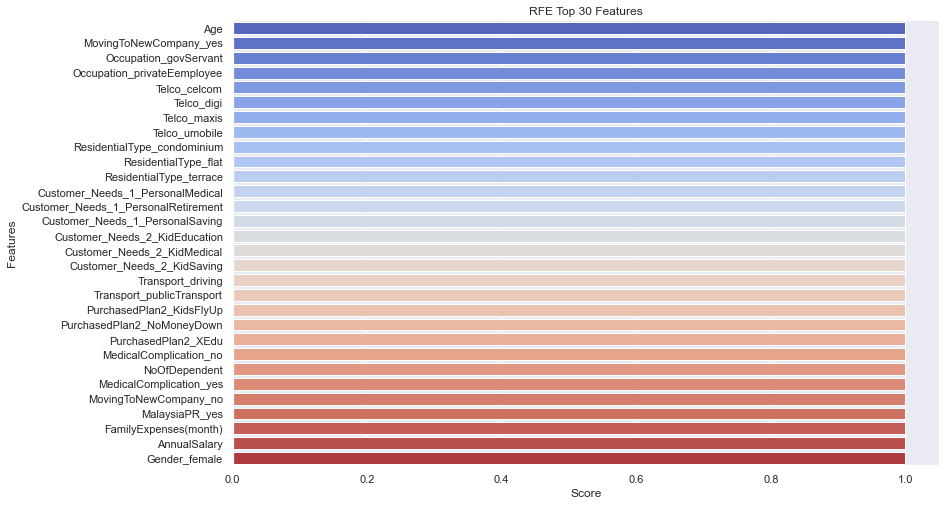

In [4440]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:30], kind = "bar", 
               height=7, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 30 Features")

In [4129]:
os_data_X.shape

(630, 50)

In [4361]:
X_train,X_test,y_train,y_test=train_test_split(os_data_x3,os_data_y,test_size=0.3,random_state=0)


In [4362]:
classifier = RandomForestClassifier(n_estimators = 50,class_weight="balanced")
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50)

In [4363]:
y_pred = classifier.predict(X_test)

In [4364]:
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.760


              precision    recall  f1-score   support

           0       0.90      0.89      0.90        72
           1       0.80      0.75      0.77        57
           2       0.71      0.76      0.73        54

    accuracy                           0.81       183
   macro avg       0.80      0.80      0.80       183
weighted avg       0.81      0.81      0.81       183



In [4306]:
confusion_majority=confusion_matrix(y_test,y_pred)
print('Confusion matrix',confusion_majority)

print('majority TNs',confusion_majority[0][0])
print('majority FPs',confusion_majority[0][1])
print('majority FNs',confusion_majority[1][0])
print('majority TPs',confusion_majority[1][1])

Confusion matrix [[64  2  6]
 [ 3 43 11]
 [ 4  9 41]]
majority TNs 64
majority FPs 2
majority FNs 3
majority TPs 43


In [4375]:
from sklearn.naive_bayes import GaussianNB

# your codes here...
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [4376]:
nb_ored=nb.predict(X_test)

In [4377]:
print("Accuracy on training set: {:.3f}".format(nb.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.648
Accuracy on test set: 0.612


In [4378]:
print(classification_report(y_test, nb_ored))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        72
           1       0.59      0.39      0.47        57
           2       0.56      0.67      0.61        54

    accuracy                           0.61       183
   macro avg       0.61      0.60      0.59       183
weighted avg       0.61      0.61      0.60       183



In [3626]:
#prob_DT =model_DT.predict_proba(X_test)
y_prob =nb.predict_proba(X_test)
y_score=y_prob[:,1]

In [3627]:

#prob_NB=prob_NB[:,1]
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

In [3628]:
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.770852 (macro),
0.769686 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.769850 (macro),
0.767035 (weighted by prevalence)


In [4312]:
confusion_majority=confusion_matrix(y_test,nb_ored)
print('Confusion matrix',confusion_majority)

print('majority TNs',confusion_majority[0][0])
print('majority FPs',confusion_majority[0][1])
print('majority FNs',confusion_majority[1][0])
print('majority TPs',confusion_majority[1][1])

Confusion matrix [[54  7 11]
 [18 22 17]
 [10  8 36]]
majority TNs 54
majority FPs 7
majority FNs 18
majority TPs 22


In [4379]:
from sklearn.neighbors import KNeighborsClassifier
 
# your codes here... 
knn=KNeighborsClassifier(n_neighbors=5)

In [4380]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [4381]:
kb_pred=knn.predict(X_test)

In [4383]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.716


In [3634]:
confusion_majority=confusion_matrix(y_test,kb_pred)
print('Confusion matrix',confusion_majority)

print('majority TNs',confusion_majority[0][0])
print('majority FPs',confusion_majority[0][1])
print('majority FNs',confusion_majority[1][0])
print('majority TPs',confusion_majority[1][1])

Confusion matrix [[59 10  2]
 [ 3 56  1]
 [20 17 19]]
majority TNs 59
majority FPs 10
majority FNs 3
majority TPs 56


In [4322]:
print(classification_report(y_test, kb_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        72
           1       0.66      0.82      0.73        57
           2       0.78      0.33      0.47        54

    accuracy                           0.72       183
   macro avg       0.73      0.69      0.67       183
weighted avg       0.73      0.72      0.69       183



In [4323]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4324]:
logreg=LogisticRegression(solver='lbfgs',max_iter=500)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [4325]:
from sklearn.metrics import accuracy_score

# your codes here...
y_pred=logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#accuracy_score(y_test,y_pred)

Accuracy of logistic regression classifier on test set: 0.60


In [4326]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        72
           1       0.52      0.56      0.54        57
           2       0.55      0.70      0.62        54

    accuracy                           0.60       183
   macro avg       0.61      0.61      0.60       183
weighted avg       0.62      0.60      0.60       183



In [4327]:
from sklearn.tree import DecisionTreeClassifier 

In [4328]:
# construct Decision Tree Model
model_DT=DecisionTreeClassifier(max_depth=3)
model_DT.fit(X_train,y_train)
y_pred=model_DT.predict(X_test)

In [4329]:
print("Accuracy on training set: {:.3f}".format(model_DT.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_DT.score(X_test, y_test)))

Accuracy on training set: 0.556
Accuracy on test set: 0.421


In [4330]:
from sklearn import model_selection

In [4334]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Logistic regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Random forest', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, os_data_X, os_data_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

Logistic regression: 0.559945 (0.094327)
KNN: 0.686639 (0.219690)
Random forest: 0.786530 (0.123337)
NB: 0.498989 (0.116481)
CART: 0.548552 (0.114658)


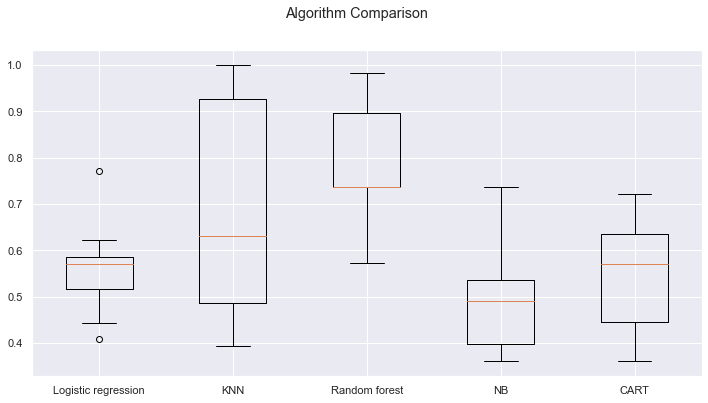

In [4335]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [3642]:
from mlxtend.frequent_patterns import apriori, association_rules 

In [4437]:
Vdf['Plan1'] = LabelEncoder().fit_transform(df.PurchasedPlan1)
#Vdf['Plan2'] = LabelEncoder().fit_transform(df.PurchasedPlan2)

In [4438]:
Vdf = Vdf.drop(['PurchasedPlan1'],1)
#Vdf = df1[['PurchasedPlan2_KidsFlyUp','PurchasedPlan2_NoMoneyDown','PurchasedPlan2_XEdu']]
Vdf

,Age,Gender,MaritalStatus,LifeStyle,HighestEducation,Race,Nationality,MalaysiaPR,MovingToNewCompany,Occupation,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,Transport,PurchasedPlan2,MedicalComplication,Plan1
0,35.0,female,single,home,Bachelor,malay,Malaysian,yes,yes,employer,...,terrace,2.0,10242.000000,118087.540698,PersonalSaving,KidMedical,driving,NoMoneyDown,no,2
1,25.0,male,single,outdoor,Diploma,chinese,Malaysian,no,yes,selfEmployed,...,terrace,2.0,6335.403694,73926.000000,PersonalRetirement,KidMedical,driving,XEdu,yes,2
2,27.0,male,single,pub_goer,Bachelor,others,Malaysian,no,no,privateEemployee,...,condominium,2.0,4316.000000,140734.000000,PersonalMedical,KidMedical,driving,KidsFlyUp,yes,2
3,33.0,female,single,pub_goer,Bachelor,malay,Malaysian,yes,no,privateEemployee,...,terrace,2.0,4845.000000,118087.540698,PersonalSaving,KidSaving,driving,NoMoneyDown,no,2
4,28.0,female,single,home,Bachelor,chinese,Malaysian,yes,yes,privateEemployee,...,condominium,2.0,9883.000000,98833.000000,PersonalRetirement,KidEducation,driving,KidsFlyUp,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.0,female,married,outdoor,Diploma,malay,Malaysian,yes,yes,privateEemployee,...,terrace,2.0,4831.000000,118087.540698,PersonalRetirement,KidMedical,driving,KidsFlyUp,yes,1
496,26.0,male,married,home,Bachelor,others,Malaysian,no,no,selfEmployed,...,condominium,2.0,7455.000000,65384.000000,PersonalMedical,KidEducation,driving,KidsFlyUp,no,2
497,19.0,female,single,home,Diploma,others,Malaysian,yes,no,privateEemployee,...,condominium,2.0,3329.000000,51962.000000,PersonalSaving,KidEducation,driving,KidsFlyUp,no,0
498,41.0,male,single,pub_goer,Bachelor,indian,Malaysian,yes,yes,privateEemployee,...,terrace,3.0,9300.000000,118087.540698,PersonalRetirement,KidSaving,driving,KidsFlyUp,no,0


Text(0, 0.5, 'Frequency of Purchase')

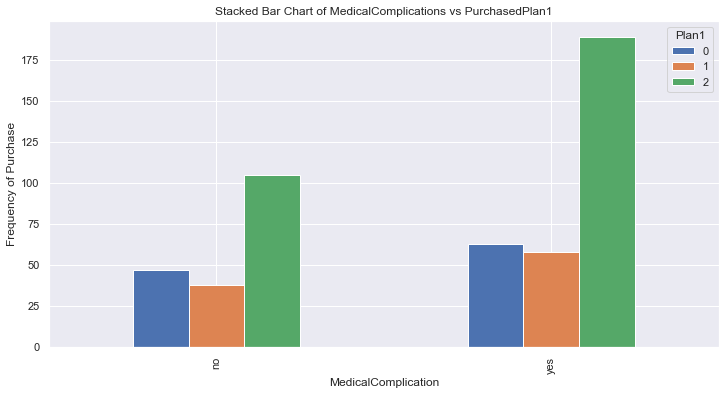

In [3982]:
#a = Vdf.groupby('Occupation').sum()


In [3806]:
#df1.head()

Text(0, 0.5, 'PurchasedPlan1')

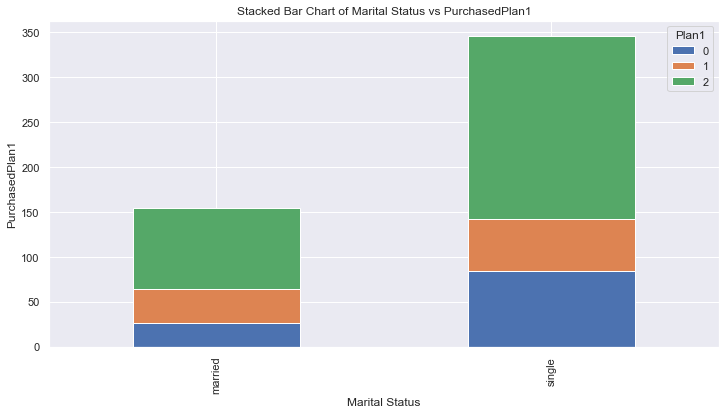

In [3983]:
table=pd.crosstab(Vdf.MaritalStatus,Vdf.Plan1).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs PurchasedPlan1')
plt.xlabel('Marital Status')
plt.ylabel('PurchasedPlan1') 

Text(0, 0.5, 'PurchasedPlan1')

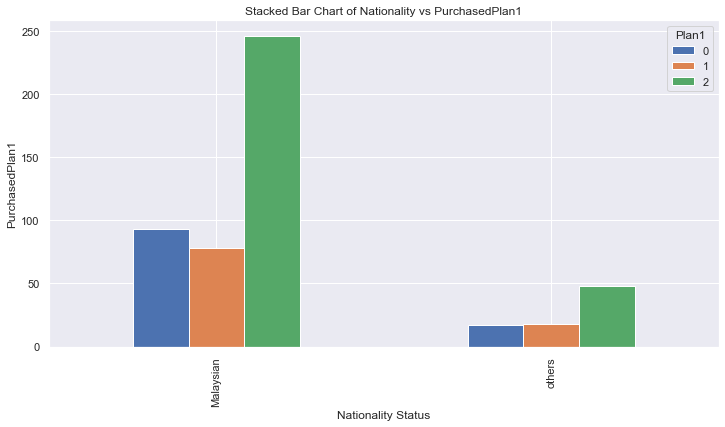

In [3984]:
table=pd.crosstab(Vdf.Nationality,Vdf.Plan1).plot(kind='bar')
plt.title('Stacked Bar Chart of Nationality vs PurchasedPlan1')
plt.xlabel('Nationality Status')
plt.ylabel('PurchasedPlan1') 

In [4384]:

#Association rule mining
Adf


,Age,Gender,MaritalStatus,LifeStyle,HighestEducation,Race,Nationality,MalaysiaPR,MovingToNewCompany,Occupation,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,home,Bachelor,malay,Malaysian,yes,yes,employer,...,terrace,2.0,10242.000000,118087.540698,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,single,outdoor,Diploma,chinese,Malaysian,no,yes,selfEmployed,...,terrace,2.0,6335.403694,73926.000000,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,single,pub_goer,Bachelor,others,Malaysian,no,no,privateEemployee,...,condominium,2.0,4316.000000,140734.000000,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,single,pub_goer,Bachelor,malay,Malaysian,yes,no,privateEemployee,...,terrace,2.0,4845.000000,118087.540698,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,single,home,Bachelor,chinese,Malaysian,yes,yes,privateEemployee,...,condominium,2.0,9883.000000,98833.000000,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.0,female,married,outdoor,Diploma,malay,Malaysian,yes,yes,privateEemployee,...,terrace,2.0,4831.000000,118087.540698,PersonalRetirement,KidMedical,HomeSafe,driving,KidsFlyUp,yes
496,26.0,male,married,home,Bachelor,others,Malaysian,no,no,selfEmployed,...,condominium,2.0,7455.000000,65384.000000,PersonalMedical,KidEducation,SchoolAgain,driving,KidsFlyUp,no
497,19.0,female,single,home,Diploma,others,Malaysian,yes,no,privateEemployee,...,condominium,2.0,3329.000000,51962.000000,PersonalSaving,KidEducation,COVIDFree,driving,KidsFlyUp,no
498,41.0,male,single,pub_goer,Bachelor,indian,Malaysian,yes,yes,privateEemployee,...,terrace,3.0,9300.000000,118087.540698,PersonalRetirement,KidSaving,COVIDFree,driving,KidsFlyUp,no


In [3810]:
from mlxtend.frequent_patterns import association_rules

In [3811]:
#to target customer
Adf=Adf[['Occupation','Customer_Needs_1','Customer_Needs_2','PurchasedPlan1','PurchasedPlan2']].copy()
#to see plan1 to likely buy plan 2

In [3812]:
from apyori import apriori

In [3813]:
records = []
for i in range(0, 500):
    records.append([str(Adf.values[i,j]) for j in range(0, 5)])
    #print(records)

In [3814]:
association_rules = apriori(records,min_support=0.0045, min_confidence=0.2,min_lift=3, min_length=2)
association_results = list(association_rules)

In [3815]:
len(association_results)

16

In [3816]:
print(association_results[0])

RelationRecord(items=frozenset({'selfEmployed', 'COVIDFree', 'KidsFlyUp', 'KidMedical'}), support=0.008, ordered_statistics=[OrderedStatistic(items_base=frozenset({'selfEmployed', 'KidsFlyUp', 'KidMedical'}), items_add=frozenset({'COVIDFree'}), confidence=0.6666666666666666, lift=3.0303030303030303)])


In [3817]:
cnt =0

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) selfEmployed -> COVIDFree
Support: 0.008
Confidence: 0.6667
Lift: 3.0303
(Rule 2) PersonalSaving -> COVIDFree
Support: 0.006
Confidence: 0.3333
Lift: 3.4014
(Rule 3) PersonalSaving -> COVIDFree
Support: 0.01
Confidence: 0.2174
Lift: 3.1056
(Rule 4) selfEmployed -> KidEducation
Support: 0.008
Confidence: 0.4444
Lift: 3.5273
(Rule 5) selfEmployed -> KidEducation
Support: 0.008
Confidence: 0.4444
Lift: 3.1746
(Rule 6) selfEmployed -> HomeSafe
Support: 0.006
Confidence: 0.3333
Lift: 3.0864
(Rule 7) PersonalSaving -> NoMoneyDown
Support: 0.008
Confidence: 0.4444
Lift: 3.8986
(Rule 8) PersonalSaving -> NoMoneyDown
Support: 0.006
Confidence: 0.2
Lift: 4.1667
(Rule 9) PersonalMedical -> COVIDFree
Support: 0.008
Confidence: 0.3077
Lift: 3.1397
(Rule 10) selfEmployed -> PersonalMedical
Support: 0.006
Confidence: 0.2143
Lift: 4.2857
(Rule 11) selfEmployed -> KidsFlyUp
Support: 0.006
Confidence: 0.3333
Lift: 7.2464
(Rule 12) PersonalMedical -> KidSaving
Support: 0.006
Confidence: 0.4286
L

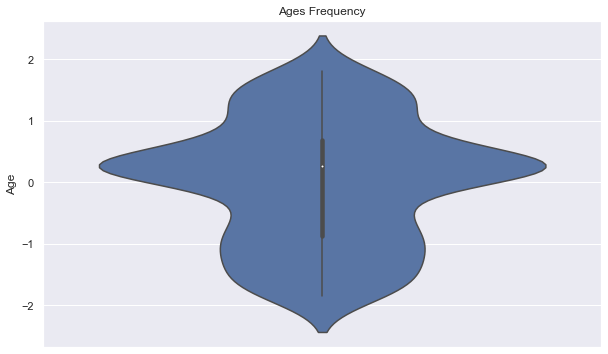

In [3552]:
#K means clustering

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
#sns.axis_style("dark")
sns.violinplot(y=Adf["Age"])
plt.show()

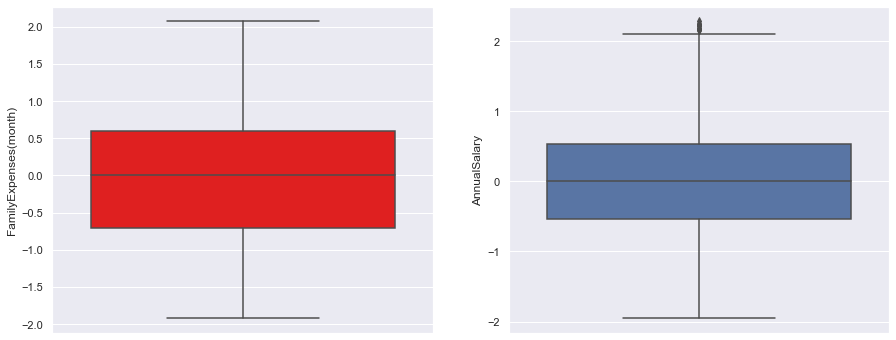

In [3553]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=Adf["FamilyExpenses(month)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=Adf["AnnualSalary"])
plt.show()

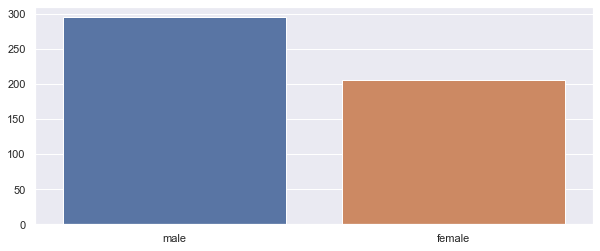

In [3563]:
genders = Adf.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

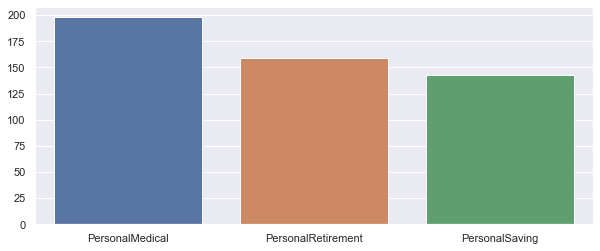

In [3564]:
Customer_Needs_1 = Adf.Customer_Needs_1.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Customer_Needs_1.index, y=Customer_Needs_1.values)
plt.show()

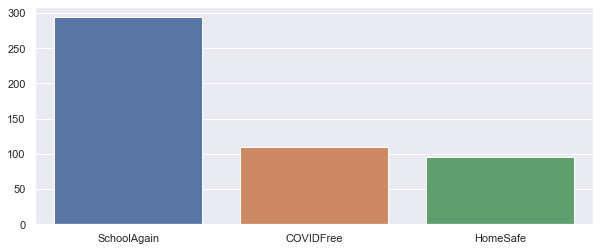

In [3565]:
PurchasedPlan1 = Adf.PurchasedPlan1.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=PurchasedPlan1.index, y=PurchasedPlan1.values)
plt.show()

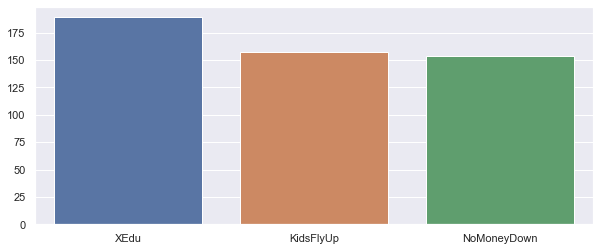

In [3566]:
PurchasedPlan2 =Adf.PurchasedPlan2.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=PurchasedPlan2.index, y=PurchasedPlan2.values)
plt.show()

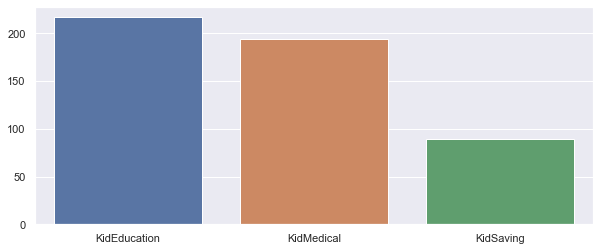

In [3567]:
Customer_Needs_2 = Adf.Customer_Needs_2.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Customer_Needs_2.index, y=Customer_Needs_2.values)
plt.show()

In [3575]:
Cdf1=Cdf

In [3585]:
labelencoder = LabelEncoder()
Cdf1['PurchasedPlan1'] = labelencoder.fit_transform(Cdf1['PurchasedPlan1'])

In [3586]:
df_final=pd.DataFrame()

In [3587]:
df_final['AnnualSalary']=Cdf1['AnnualSalary']
df_final['FamilyExpenses(month)']=Cdf1['FamilyExpenses(month)']
df_final['PurchasedPlan1']=Cdf1['PurchasedPlan1']

In [3588]:
df_final=df_final.to_numpy()

In [3589]:
df_final

array([[1.18087541e+05, 1.02420000e+04, 2.00000000e+00],
       [7.39260000e+04, 6.33540369e+03, 2.00000000e+00],
       [1.40734000e+05, 4.31600000e+03, 2.00000000e+00],
       ...,
       [5.19620000e+04, 3.32900000e+03, 0.00000000e+00],
       [1.18087541e+05, 9.30000000e+03, 0.00000000e+00],
       [1.18087541e+05, 7.50000000e+03, 1.00000000e+00]])

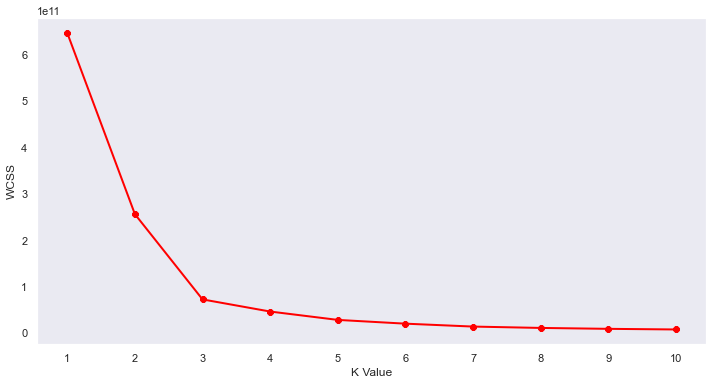

In [3590]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [3591]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [3592]:
y_kmeans = kmeans.fit_predict(df_final)

In [3593]:
from mpl_toolkits.mplot3d import Axes3D

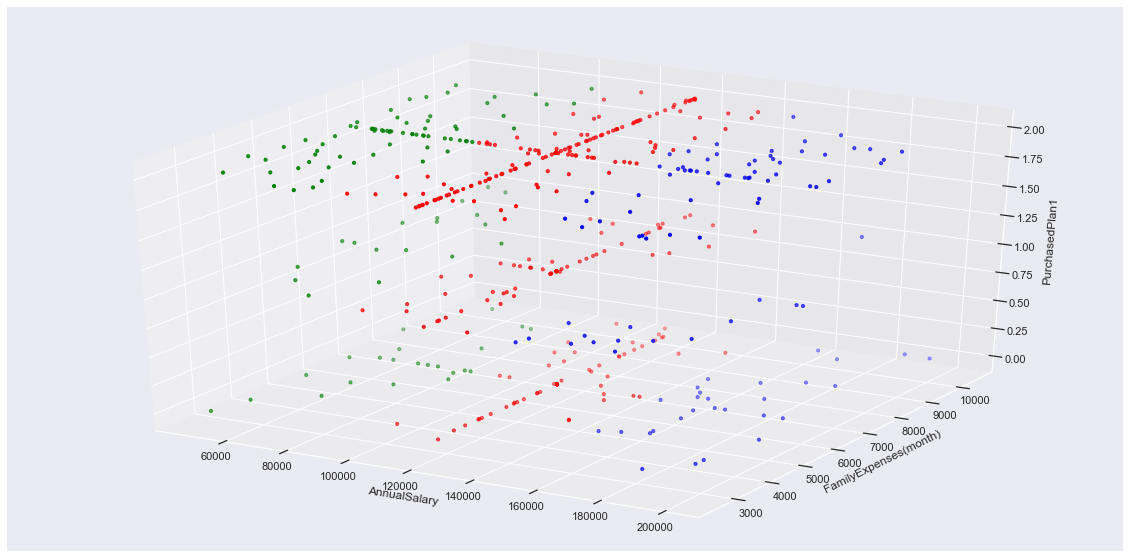

In [3594]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_final[y_kmeans==0, 0], df_final[y_kmeans==0, 1],df_final[y_kmeans==0, 2], s=10, c='red', label ='Cluster 1')
ax.scatter(df_final[y_kmeans==1, 0], df_final[y_kmeans==1, 1],df_final[y_kmeans==1, 2] ,s=10, c='blue', label ='Cluster 2')
ax.scatter(df_final[y_kmeans==2, 0], df_final[y_kmeans==2, 1],df_final[y_kmeans==2, 2], s=10, c='green', label ='Cluster 3')
ax.scatter(df_final[y_kmeans==3, 0], df_final[y_kmeans==3, 1],df_final[y_kmeans==3, 2], s=10, c='cyan', label ='Cluster 4')
plt.xlabel("AnnualSalary")
plt.ylabel("FamilyExpenses(month)")
ax.set_zlabel('PurchasedPlan1')
plt.show()